In [1]:
# Importing Libraries
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Loading dataset from Hugging Face and converting it to a pandas DataFrame
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Converting the 'job_posted_date' column to datetime format
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Converting 'job_skills' string representations of lists into actual Python lists
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# Define the country of interest
v_job_country = 'India'

# Define the job title to focus on
v_job_title = 'Data Scientist'

In [3]:
# Filter dataset for the selected country
df_Ind = df[df['job_country'] == v_job_country].copy()

# Remove rows with missing salary information for clean analysis
df_Ind_cleaned = df_Ind.dropna(subset=['salary_year_avg'])

In [4]:
# Calculate median salary per job title and get top 6 highest paying roles
top_roles = df_Ind_cleaned.groupby('job_title_short')['salary_year_avg'].median() \
                         .sort_values(ascending=False).head(6).index.tolist()

# Remove any roles containing "Engineer" from the top roles list
top_roles = [role for role in top_roles if "Engineer" not in role]

# Filter the cleaned dataset to include only the top roles identified earlier
df_Ind_top_roles = df_Ind_cleaned[df_Ind_cleaned['job_title_short'].isin(top_roles)]

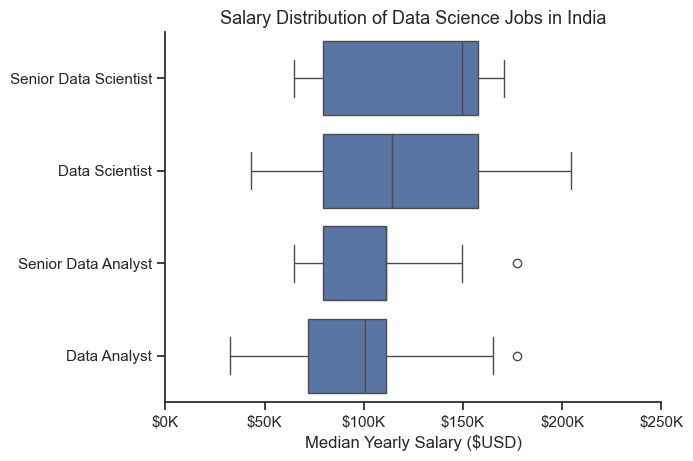

In [5]:
# Set the seaborn theme for the plot
sns.set_theme(style='ticks')

# Create a horizontal boxplot to show salary distribution by job title,
# ordering the job titles based on the top_roles list
sns.boxplot(data = df_Ind_top_roles,
            x = 'salary_year_avg',
            y = 'job_title_short',
            order = top_roles)

# Remove the top and right spines for a cleaner look
sns.despine()

# Set x-axis limit to focus on salaries up to 250K USD
plt.xlim(0, 250_000)

# Format x-axis labels to show in 'K' dollars (e.g., $150K)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))

# Set the plot title and axis labels
plt.title(f"Salary Distribution of Data Science Jobs in {v_job_country}", fontsize=13)
plt.xlabel('Median Yearly Salary ($USD)')
plt.ylabel("")

# Display the plot
plt.show()